<a href="https://colab.research.google.com/github/jenius13/scikit-lerarn_diabetes/blob/master/scikit_lerarn_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Load Dataset

In [0]:
data=pd.read_csv('/content/dataset_37_diabetes.csv')
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


# Data info

In [0]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [0]:
col=data.columns

for i in col:
  print(data[i].describe())

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: preg, dtype: float64
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: plas, dtype: float64
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: pres, dtype: float64
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: skin, dtype: float64
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: insu, dtype: float64
count    768.000000
mean      31.992578
std        7.884160
min  

# Class Negetive vs Positive

In [0]:
data['class'].value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [0]:
round(data['class'].value_counts()[0]/data['class'].value_counts()[1],2)

1.87

In [0]:
data.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


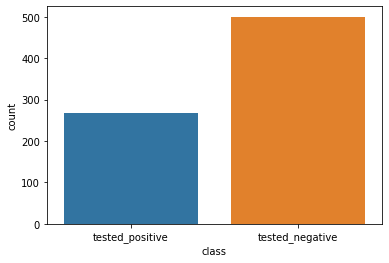

In [0]:
sns.countplot(data['class'])

In [0]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [0]:
pd.isnull(data)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [0]:
df=pd.DataFrame(data)
print(df)

     preg  plas  pres  skin  insu  mass   pedi  age            class
0       6   148    72    35     0  33.6  0.627   50  tested_positive
1       1    85    66    29     0  26.6  0.351   31  tested_negative
2       8   183    64     0     0  23.3  0.672   32  tested_positive
3       1    89    66    23    94  28.1  0.167   21  tested_negative
4       0   137    40    35   168  43.1  2.288   33  tested_positive
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
763    10   101    76    48   180  32.9  0.171   63  tested_negative
764     2   122    70    27     0  36.8  0.340   27  tested_negative
765     5   121    72    23   112  26.2  0.245   30  tested_negative
766     1   126    60     0     0  30.1  0.349   47  tested_positive
767     1    93    70    31     0  30.4  0.315   23  tested_negative

[768 rows x 9 columns]


# LabelEncoder

#####LabelEncoder를 이용하여 class를 0,1로 바꿔 준다

In [0]:
from sklearn.preprocessing import LabelEncoder
lb_make=LabelEncoder()
df['class']=lb_make.fit_transform(df['class'])

print(df)

     preg  plas  pres  skin  insu  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]


In [0]:
print("is null->",pd.isnull(df).sum())
print("is nan->",pd.isna(df).sum())

is null-> preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64
is nan-> preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64


# Positive vs Negative

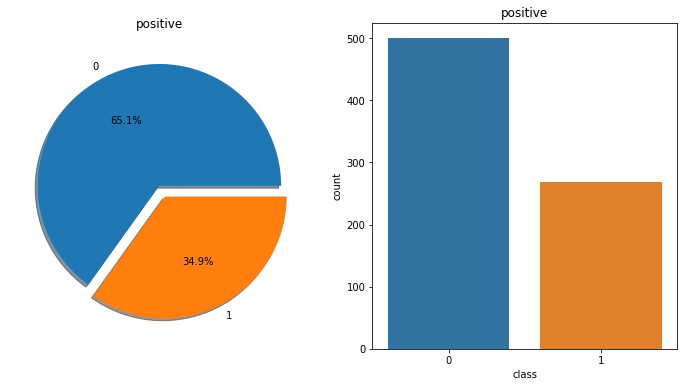

In [0]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df['class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('positive')
ax[0].set_ylabel('')
sns.countplot('class',data=df,ax=ax[1])
ax[1].set_title('positive')
plt.show()

# Positive vs Negative (considering age)

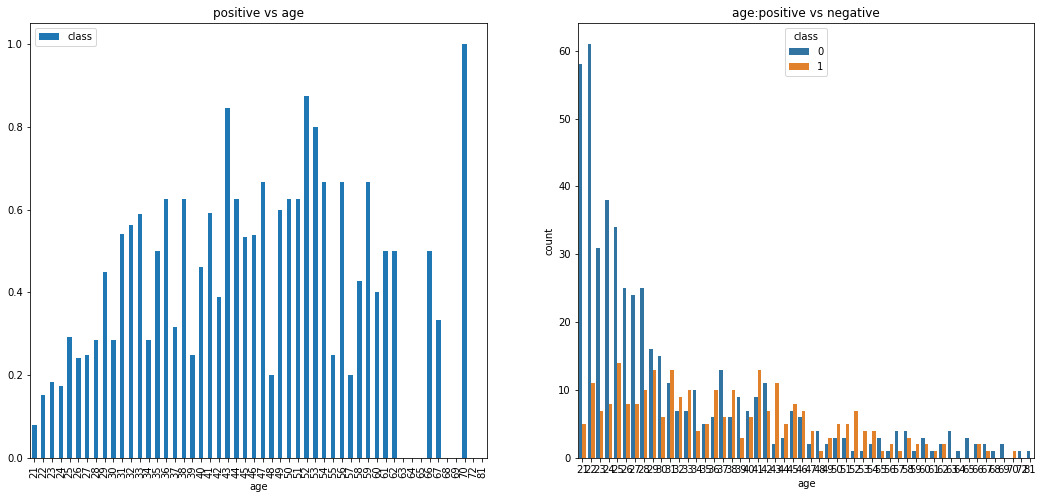

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['age','class']].groupby(['age']).mean().plot.bar(ax=ax[0])
ax[0].set_title('positive vs age')
sns.countplot('age',hue='class',data=df,ax=ax[1])
ax[1].set_title('age:positive vs negative')
plt.show()


# Train_Test_Split

In [0]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [0]:
# class 부분을 제외한 모든 부분
X=df.iloc[:,:-1]
# class부분만 labeling
y=df.iloc[:,-1]

# print(X)
# print(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [0]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier

In [0]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print('DecisionTreeClassifier :%.2f' % (metrics.accuracy_score(y_pred,y_test)*100))

DecisionTreeClassifier :66.88


# Random Forest Classifier

In [0]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print('RandomForestClassifier:%.2f'%(metrics.accuracy_score(y_pred,y_test)*100))

RandomForestClassifier:74.68


# Feature Importance

In [0]:
features = pd.Series(
    model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(features)


plas    0.270996
mass    0.165067
age     0.133977
pedi    0.126823
pres    0.089076
preg    0.076481
insu    0.069395
skin    0.068184
dtype: float64


##### plas,mass가 중요 features로 나타나며 우리가 알고 있는 age가 그 다음의 중요 feature로 나타났다.
#### plas,mass,age,pedi가 주요 features